## Ejercicios de pair programming 26 enero: Decision Tree


En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal. El objetivo de hoy es:

- Ajustar el modelo a un Decision Tree.
- Extraer las métricas.
- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas).

In [69]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Para evitar que salgan los warnings en jupyter
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Abrimos nuestro DataFrame
df = pd.read_csv("archive/encoding.csv", index_col = 0)
df.reset_index(inplace= True)

In [71]:
df.drop(["region", "region.1"], axis = 1, inplace = True)
df.head()

,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,region_Middle East and Northern Africa,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe
0,-0.993631,7.587,0.667797,1.184471,0.817892,1.142818,2.674027,0.488939,0.450617,0,0,0,0,0,0,0,0,0,1
1,-0.980892,7.561,0.519256,1.336192,0.835310,0.976182,0.301121,1.360830,0.722398,0,0,0,0,0,0,0,0,0,1
2,-0.968153,7.527,0.555780,1.216329,0.636395,1.069507,3.217869,0.767717,0.413316,0,0,0,0,0,0,0,0,0,1
3,-0.955414,7.522,0.766346,1.131058,0.665118,1.161655,2.207255,0.802712,0.373969,0,0,0,0,0,0,0,0,0,1
4,-0.942675,7.427,0.557057,1.107057,0.720608,0.995200,1.904941,1.497125,0.354023,0,0,0,0,0,1,0,0,0,0


In [72]:
X = df.drop("happiness_score", axis = 1)
y = df["happiness_score"]

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [74]:
arbol = DecisionTreeRegressor(random_state =0)
 
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

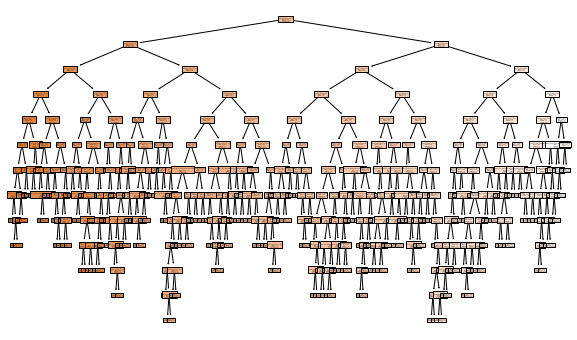

In [75]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

In [76]:
max_features = np.sqrt(len(x_train.columns))
max_features

4.242640687119285

In [77]:
print(arbol.tree_.max_depth)

12


In [78]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [79]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [80]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.066683,0.009145,0.095631,0.993808,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


In [81]:
param = {"max_depth": [2,4], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [82]:

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error")

In [83]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [84]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=4, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

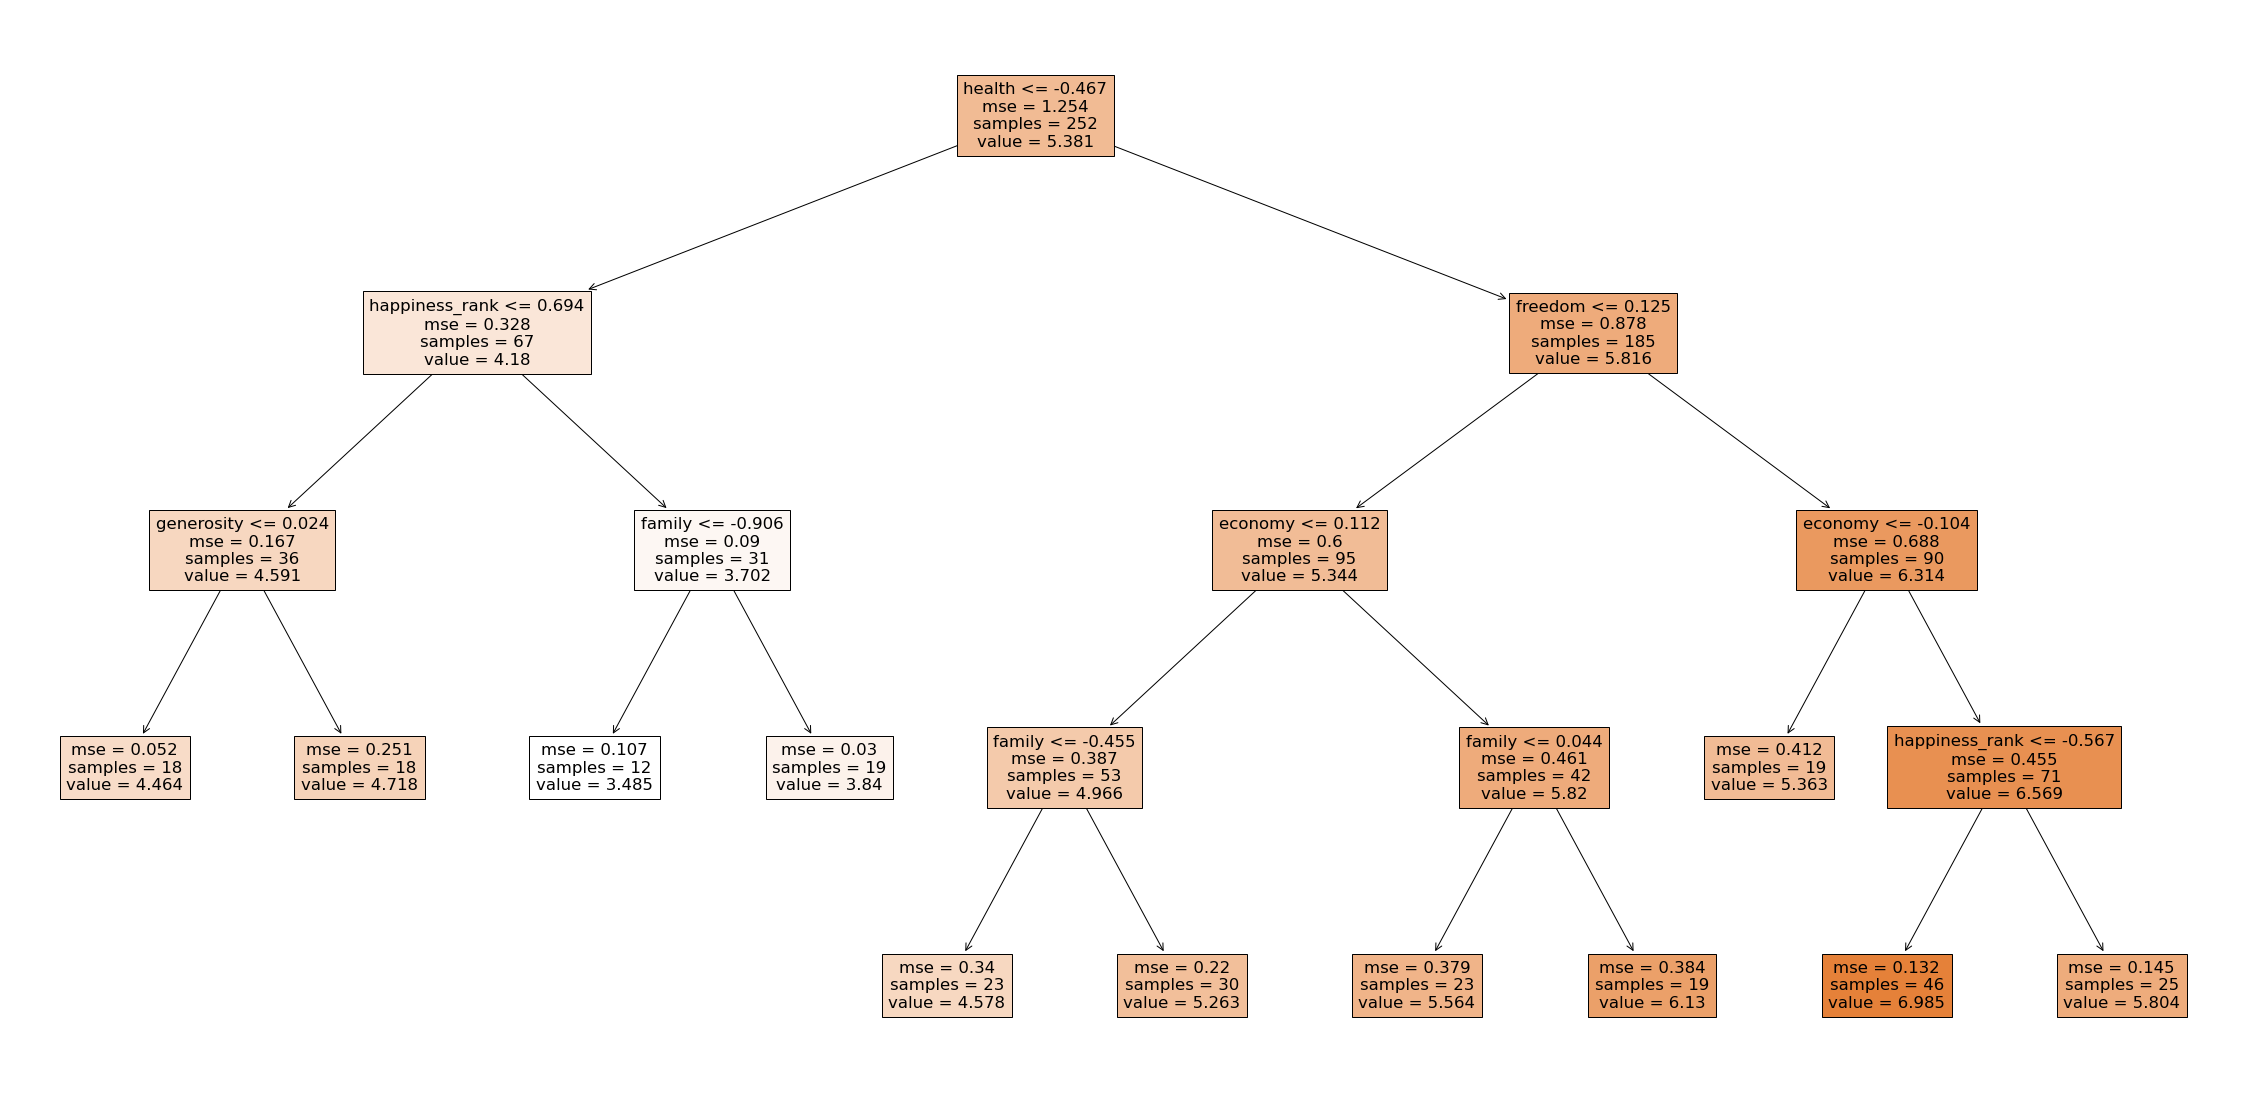

In [85]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [86]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [87]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.348546,0.191574,0.437692,0.870289,test,Decision tree II
1,0.360003,0.219433,0.468437,0.825075,train,Decision tree II


In [88]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.066683,0.009145,0.095631,0.993808,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,0.348546,0.191574,0.437692,0.870289,test,Decision tree II
1,0.360003,0.219433,0.468437,0.825075,train,Decision tree II


In [89]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )

importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,health,0.504702
4,freedom,0.167024
1,economy,0.149327
0,happiness_rank,0.137029
2,family,0.039690
6,generosity,0.002229
12,region_Middle East and Northern Africa,0.000000
16,region_Sub-Saharan Africa,0.000000
15,region_Southern Asia,0.000000
14,region_Southeastern Asia,0.000000


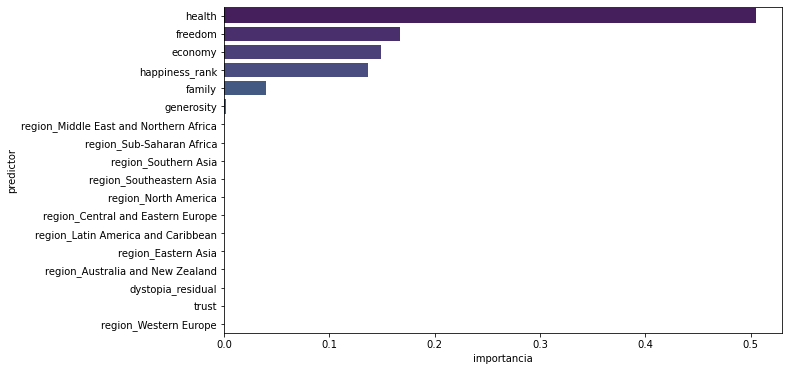

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

Viendo el gráfico, vemos que las variables que más afectan a nuestra respuesta, son la esperanza de vida y la libertad socio-cultural del país.

### **Decision Tree**

De entrada, hemos trabajado con 3 parámetros de profundidad, pero nos hemos encontrado con un valor overfitting, así que hemos decidido restar un valor y así bajar la profundidad, para rebajar el nivel de ajuste.

Con eso, hemos conseguido un modelo menos ajustado que nos daría menos fallos en el futuro.